In [2]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv("insurance.csv")

df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region_number'] = df['region'].astype('category').cat.codes

def calculate_risk(row):
    risk = 0
    risk += row['age'] * 0.2
    risk += row['bmi'] * 0.3
    risk += row['smoker'] * 30
    return round(risk, 2)

df['risk_score'] = df.apply(calculate_risk, axis=1)

def risk_bucket(score):
    if score < 20:
        return 'Low'
    elif score < 40:
        return 'Medium'
    else:
        return 'High'

df['risk_category'] = df['risk_score'].apply(risk_bucket)

print(df.head()) 
 

   age  sex     bmi  children  smoker     region      charges  region_number  \
0   19    0  27.900         0       1  southwest  16884.92400              3   
1   18    1  33.770         1       0  southeast   1725.55230              2   
2   28    1  33.000         3       0  southeast   4449.46200              2   
3   33    1  22.705         0       0  northwest  21984.47061              1   
4   32    1  28.880         0       0  northwest   3866.85520              1   

   risk_score risk_category  
0       42.17          High  
1       13.73           Low  
2       15.50           Low  
3       13.41           Low  
4       15.06           Low  


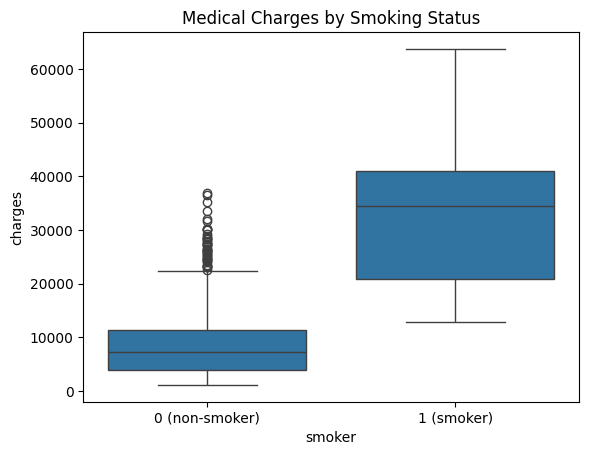

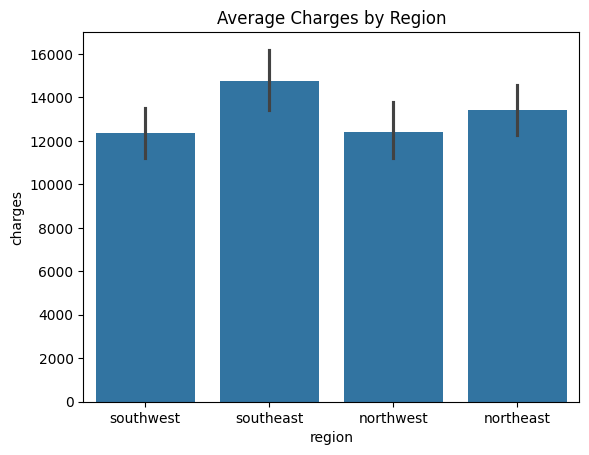

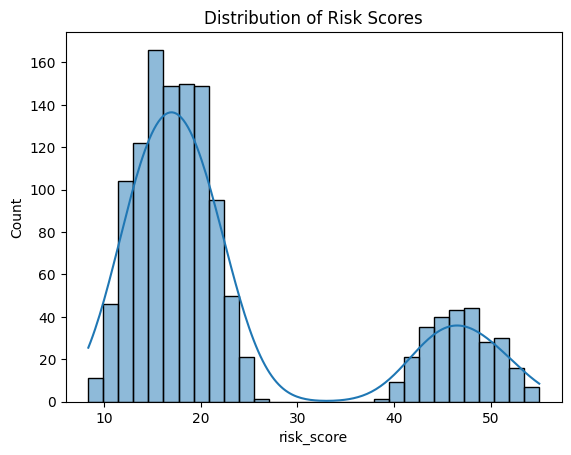

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cost by smoking status
labels = ['0 (non-smoker)', '1 (smoker)']
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoking Status")
plt.xticks(ticks=[0, 1], labels=labels)
plt.show()

# Cost by region
sns.barplot(x='region', y='charges', data=df)
plt.title("Average Charges by Region")
plt.show()

# Risk score distribution
sns.histplot(df['risk_score'], bins=30, kde=True)
plt.title("Distribution of Risk Scores")
plt.show()

Medical Charges by Smoking Status
- Smokers have significantly higher medical charges on average compared to non-smokers so tthis indicates that being a smoker is a strong predictor of medical charges and health-related risk

Average Charges by Region
- The southwest and northwest regions show the lowest average charges, suggestion a potentially healthier population or lower medical costs
- People in the southeast region have the highest average medical charges indicating a regional lifestyle or healthcare access factors

Distributions of Risk Scores
- The distribution is bimodal, meaning that there are two distinct groups 
- Most individuals fall into the lower risk category with the scores being between 10 and 25. There is a smaller high-risk group with scores clustering around 40-50 that likely represents older individuals who smoke and have higher BMI

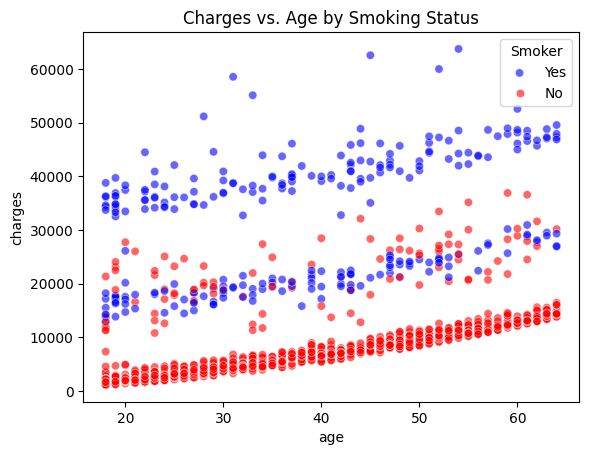

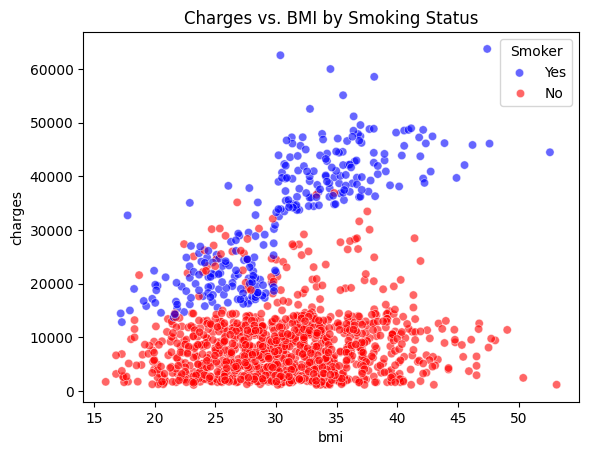

In [4]:

sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6, palette={0: "red", 1: "blue"})
plt.title("Charges vs. Age by Smoking Status")
plt.legend(title="Smoker", labels=["Yes", "No"])
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6, palette={0: "red", 1: "blue"})
plt.title("Charges vs. BMI by Smoking Status")
plt.legend(title="Smoker", labels=["Yes", "No"])
plt.show()

Charges vs Age by Smoking Status
- Smokers have much higher charges than non-smokers across almost all ages
- For non-smokers, charges increase gradually and steadily with age which is a reflection of normal aging-related healthcare neeeds
- The combined effect of age and smoking appears to be strong as older smokers have the highest charges

Charges vs BMI by Smoking Status
- Again, smokers have significantly higher charges across all BMI levels
- For non-smokers charges are lower and less spread out even with increasing BMI
- Smokers with high BMI show especially high charges which suggests a compounding effect with smoking and BMI

R2 Score: 0.783311227001979
RMSE: 5800.0566494174545


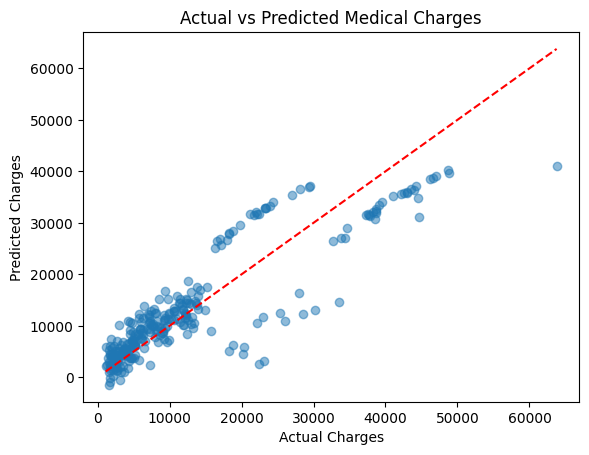

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

X = df[['age', 'bmi', 'smoker', 'children', 'region_number']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

df['predicted_cost'] = model.predict(X)
df.to_csv("insurance_risk_report.csv", index=False)

joblib.dump(model, 'linreg_model.pkl')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

- The red dash line is where predicted = actual
- As the charges increase, most of the values are below the red dash line so this means that the model is understimating